## Things to do

- Problem Statement
- Data set (min 7000 rows)
- Handling missing data
- Handling feature scaling
- Best possible methods (Algorithms) for our dataset
- Visualization


## Dataset Overview

Nearest Earth Objects (NEO)

Link - https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024/data

This dataset contains **338,199** records of objects that come close to Earth, known as **NEOs (Near-Earth Objects)**, recorded between **1910 and 2024**. NASA monitors these objects to assess their potential risk to the planet.

### Key Features

- **neo_id**: Unique identifier for each NEO.
- **name**: Designation or name of the object.
- **absolute_magnitude**: The intrinsic brightness of the object.
- **estimated_diameter_min/max**: Estimated size range of the object.
- **relative_velocity**: The object's speed relative to Earth (in km/h).
- **miss_distance**: How close the object will come to Earth (in km).
- **is_hazardous**: A boolean field indicating if NASA classifies the object as potentially dangerous.


## Problem Statement

Predicting Potentially Hazardous NEOs
The goal is to build a machine learning model to predict whether a **Near-Earth Object (NEO)** is classified as **"hazardous"** by NASA.

### Objectives

1. **Preprocessing**: Clean the dataset and handle missing values.
2. **Feature Selection**:
   Used key features such as:
   - Absolute magnitude
   - Estimated diameter
   - Relative velocity
   - Miss distance
3. **Oversampling**: Address class imbalance by applying **SMOTE** (Synthetic Minority Oversampling Technique) to balance the target class (`is_hazardous`).
4. **Modeling**: Train a model to predict the `is_hazardous` label (True/False).
5. **Evaluation**: Use metrics such as **accuracy**, **precision**, **recall**, and **ROC-AUC score** to evaluate the model.


In [1]:
import pandas as pd
df = pd.read_csv('../data/nearest-earth-objects.csv')

df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


## Dataset Preprocessing


In [2]:
# Remove rows with missing values
df_cleaned = df.dropna()

In [3]:
missing_values = df_cleaned.isnull()

# To get a summary of missing values in each column:
missing_values_summary = missing_values.sum()

missing_values_summary

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

Dropping unnecessary columns


In [4]:
# Drop 'neo_id', 'name', and 'orbiting_body' since they are not useful for prediction
df_cleaned = df_cleaned.drop(columns=['neo_id', 'name', 'orbiting_body'])

Feature Scaling using MinMaxScaler


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Select the features to scale
features_to_scale = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 
                     'relative_velocity', 'miss_distance']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling
df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])

The dataset contains 9 columns and 338171 rows of data


In [6]:
df_cleaned.shape

(338171, 6)

Heavily Skewed Data Set


In [7]:
target_column = df_cleaned['is_hazardous']

# Count the occurrences of True and False
true_count = target_column.value_counts()[1]
false_count = target_column.value_counts()[0]

true_count, false_count

C:\Users\amrit\AppData\Local\Temp\ipykernel_21944\1876494894.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_count = target_column.value_counts()[1]
C:\Users\amrit\AppData\Local\Temp\ipykernel_21944\1876494894.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  false_count = target_column.value_counts()[0]


(43162, 295009)

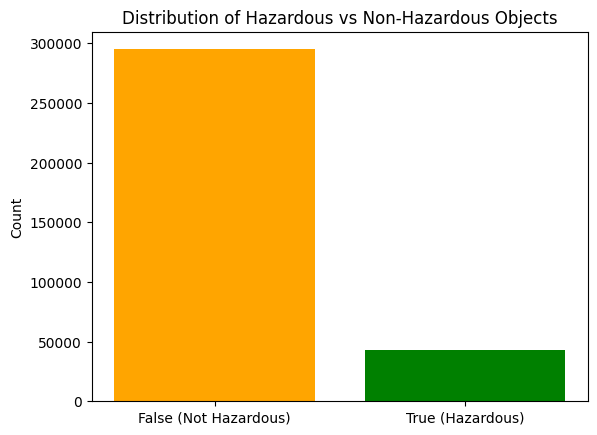

In [9]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize the distribution of True and False
labels = ['False (Not Hazardous)', 'True (Hazardous)']
counts = [false_count, true_count]

plt.bar(labels, counts, color=['orange', 'green'])
plt.title('Distribution of Hazardous vs Non-Hazardous Objects')
plt.ylabel('Count')
plt.show()

Resampling (Oversampling) with SMOTE


In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_cleaned.drop(columns=['is_hazardous'])
y = df_cleaned['is_hazardous']

# Split the dataset into training and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Apply SMOTE only to the training set to avoid data leakage
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(y_train_resampled.value_counts())

is_hazardous
False    206396
True     206396
Name: count, dtype: int64


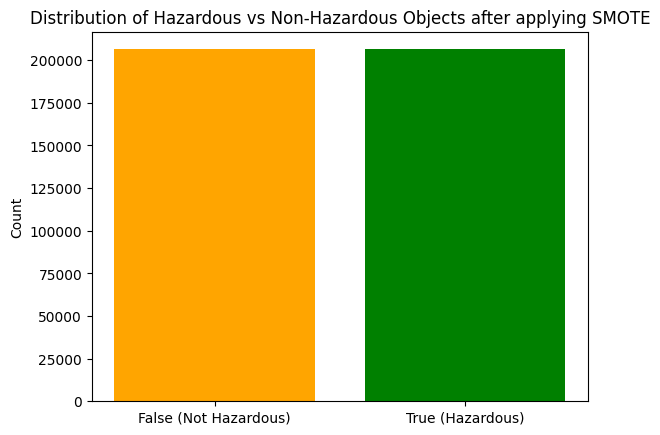

In [2]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize the distribution of True and False
labels = ['False (Not Hazardous)', 'True (Hazardous)']
false_c = 206396
true_c = 206396
counts = [false_c, true_c]

plt.bar(labels, counts, color=['orange', 'green'])
plt.title('Distribution of Hazardous vs Non-Hazardous Objects after applying SMOTE')
plt.ylabel('Count')
plt.show()

## Training


Random Forest


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training set
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print the evaluation results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)


Confusion Matrix:
 [[82920  5693]
 [ 3853  8986]]

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.94      0.95     88613
        True       0.61      0.70      0.65     12839

    accuracy                           0.91    101452
   macro avg       0.78      0.82      0.80    101452
weighted avg       0.91      0.91      0.91    101452

Accuracy: 0.9059062413752317
ROC AUC Score: 0.943386150661994


KNN


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the resampled training set
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)

# Print the evaluation results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[72904 15709]
 [ 3318  9521]]

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.82      0.88     88613
        True       0.38      0.74      0.50     12839

    accuracy                           0.81    101452
   macro avg       0.67      0.78      0.69    101452
weighted avg       0.88      0.81      0.84    101452

Accuracy: 0.8124531798288845


Logistic Regression


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the resampled training set
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])

# Print the evaluation results
print("Confusion Matrix:\n", conf_matrix_logreg)
print("\nClassification Report:\n", class_report_logreg)
print("Accuracy:", accuracy_logreg)
print("ROC AUC Score:", roc_auc_logreg)


Confusion Matrix:
 [[63364 25249]
 [ 1542 11297]]

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.72      0.83     88613
        True       0.31      0.88      0.46     12839

    accuracy                           0.74    101452
   macro avg       0.64      0.80      0.64    101452
weighted avg       0.89      0.74      0.78    101452

Accuracy: 0.73592437803099
ROC AUC Score: 0.8356701345776563


Decision Tree


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled training set
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# Print the evaluation results
print("Confusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", class_report_dt)
print("Accuracy:", accuracy_dt)
print("ROC AUC Score:", roc_auc_dt)

Confusion Matrix:
 [[80745  7868]
 [ 4453  8386]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.91      0.93     88613
        True       0.52      0.65      0.58     12839

    accuracy                           0.88    101452
   macro avg       0.73      0.78      0.75    101452
weighted avg       0.89      0.88      0.88    101452

Accuracy: 0.878553404565706
ROC AUC Score: 0.782187775329878


## Visualization


C:\Users\amrit\AppData\Local\Temp\ipykernel_23972\3653782360.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


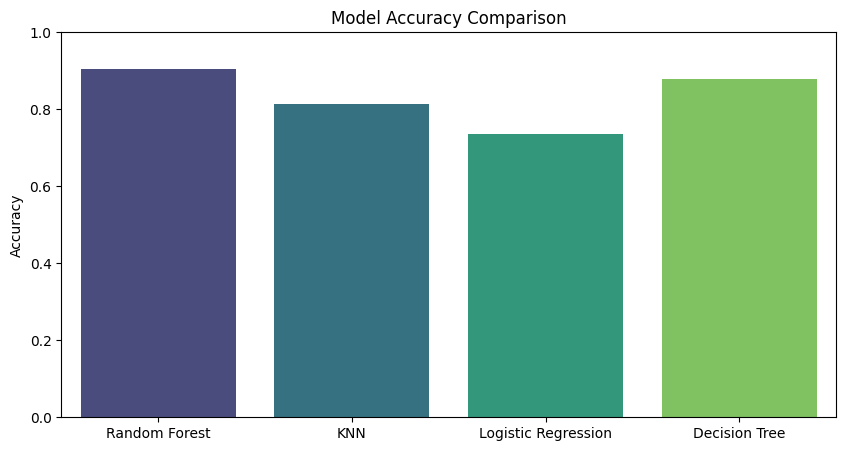

C:\Users\amrit\AppData\Local\Temp\ipykernel_23972\3653782360.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=roc_aucs, palette='magma')


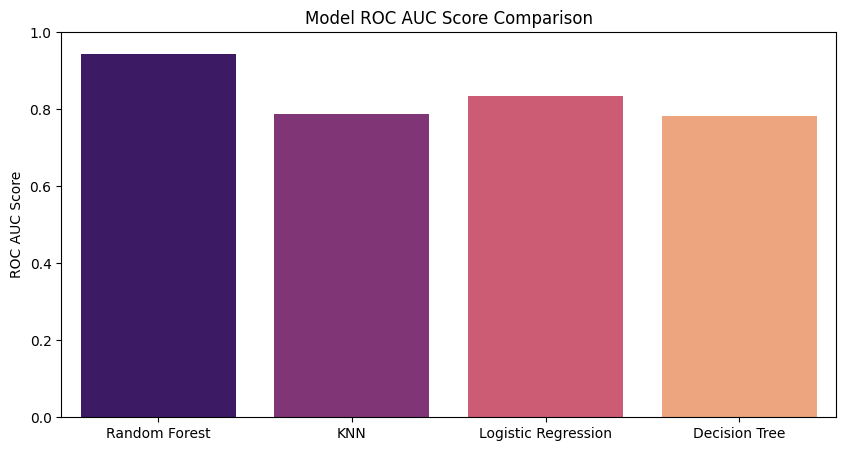

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Store accuracy and ROC AUC scores in a dictionary
model_performance = {
    'Random Forest': {'accuracy': 0.9059, 'roc_auc': 0.9434},
    'KNN': {'accuracy': 0.8125, 'roc_auc': 0.7868},
    'Logistic Regression': {'accuracy': 0.7359, 'roc_auc': 0.8357},
    'Decision Tree': {'accuracy': 0.8785, 'roc_auc': 0.7821},
}

# Extract model names and their corresponding accuracy and ROC-AUC scores
model_names = list(model_performance.keys())
accuracies = [model_performance[model]['accuracy'] for model in model_names]
roc_aucs = [model_performance[model]['roc_auc'] for model in model_names]

# Plot the accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot the ROC AUC scores
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=roc_aucs, palette='magma')
plt.title('Model ROC AUC Score Comparison')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1)
plt.show()

# Plot ROC Curves for all models (with y_test and predicted probabilities for each model)
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        # Predict probabilities
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
        else:
            y_proba = model.decision_function(X_test)  # For models like SVM that don't use predict_proba
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(loc="lower right")
    plt.show()

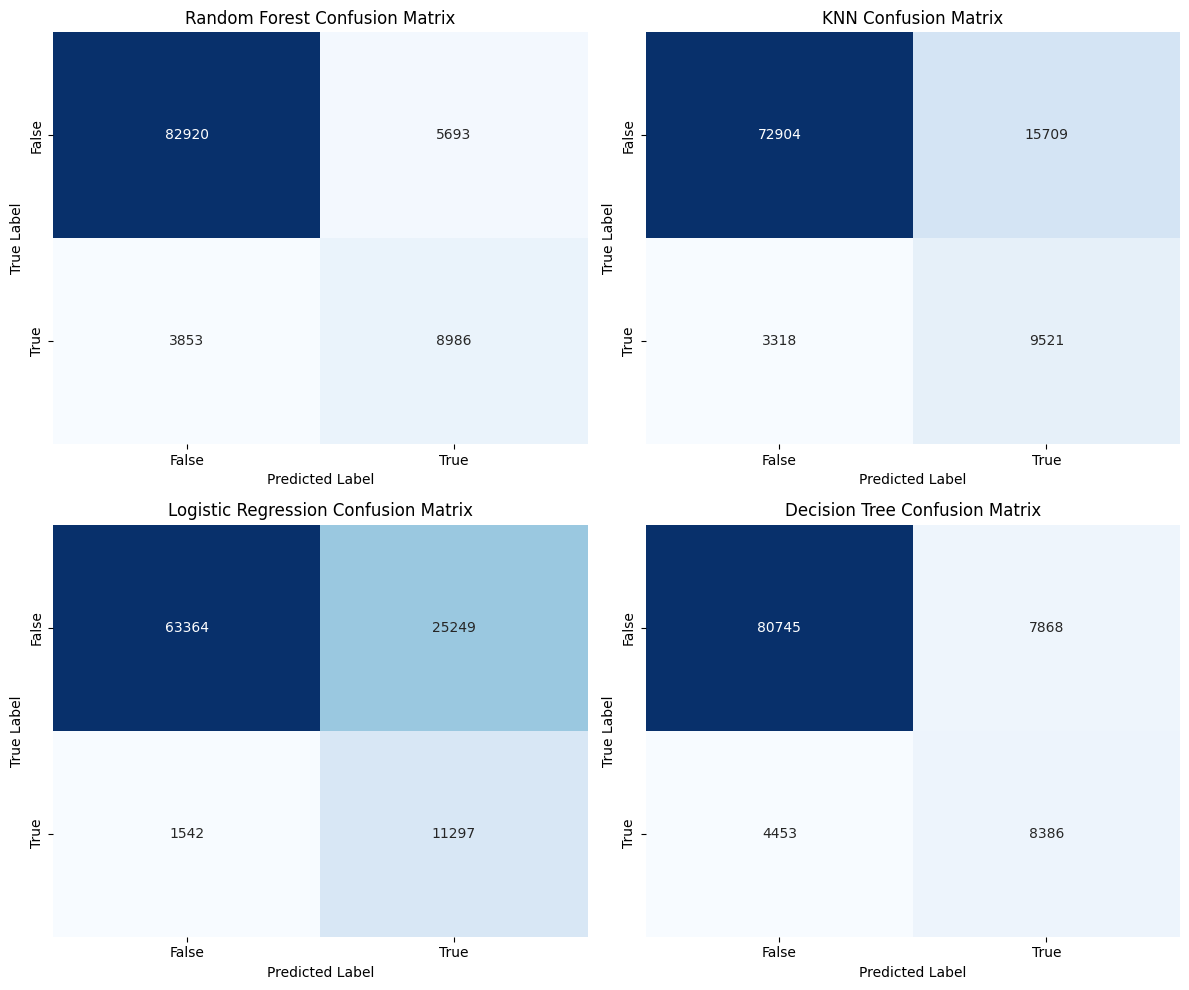

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Define the confusion matrices
confusion_matrices = {
    'Random Forest': [[82920,  5693], [3853,  8986]],
    'KNN': [[72904, 15709], [3318,  9521]],
    'Logistic Regression': [[63364, 25249], [1542, 11297]],
    'Decision Tree': [[80745,  7868], [4453,  8386]],
}

# Plotting function for confusion matrices
def plot_confusion_matrices(confusion_matrices):
    plt.figure(figsize=(12, 10))
    for i, (model, cm) in enumerate(confusion_matrices.items()):
        plt.subplot(2, 2, i + 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['False', 'True'], yticklabels=['False', 'True'])
        plt.title(f'{model} Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_confusion_matrices(confusion_matrices)